In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import warnings
warnings.simplefilter("ignore")

train_path = "./used_car_train_20200313.csv"
test_path = "./used_car_testB_20200421.csv"

In [5]:
train_data = pd.read_csv(train_path, sep=" ")
test_data = pd.read_csv(test_path, sep=" ")

In [6]:
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


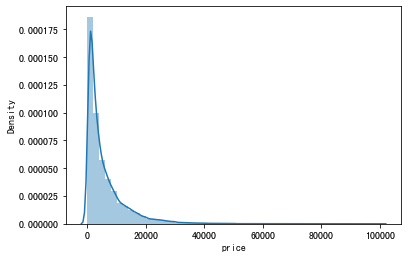

In [28]:
import scipy.stats as stats
# plt.subplots()
# sns.distplot(train_data["price"], kde=False, fit=stats.johnsonsu)
plt.subplots()
sns.distplot(train_data["price"])
plt.show()

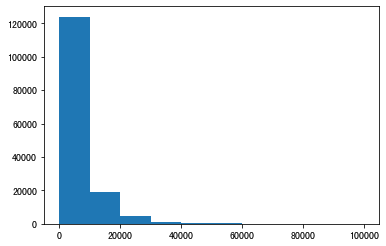

In [33]:
plt.hist(train_data['price'])
plt.show()

In [34]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

In [35]:
numeric_features.append('price')

In [47]:
price_numeric = train_data[numeric_features]
correlation = price_numeric.corr()
correlation.nlargest(5, 'price')

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
price,0.219834,-0.440519,0.628397,0.060914,0.085322,-0.730946,-0.147085,0.164317,0.068970,-0.053024,0.685798,-0.206205,-0.246175,-0.275320,0.692823,-0.013993,0.035911,1.000000
v_12,0.161990,-0.370153,0.415711,-0.087593,0.535270,-0.811301,-0.134611,-0.258521,-0.070238,0.385378,0.882121,-0.313634,0.001289,0.006695,1.000000,0.001512,0.002045,0.692823
v_8,0.155956,-0.407686,0.514149,-0.298966,0.180285,-0.933161,0.051741,0.010686,-0.294956,0.028695,1.000000,-0.063577,0.094497,-0.369353,0.882121,0.250423,0.030416,0.685798
v_0,0.215028,-0.225034,1.000000,0.245049,-0.452591,-0.710480,-0.259714,0.726250,0.243783,-0.584363,0.514149,-0.186243,-0.582943,-0.667809,0.415711,-0.136938,-0.039809,0.628397
power,1.000000,-0.019631,0.215028,0.023746,-0.031487,-0.185342,-0.141013,0.119727,0.025648,-0.060397,0.155956,-0.140203,-0.092717,-0.122107,0.161990,-0.103430,-0.023808,0.219834


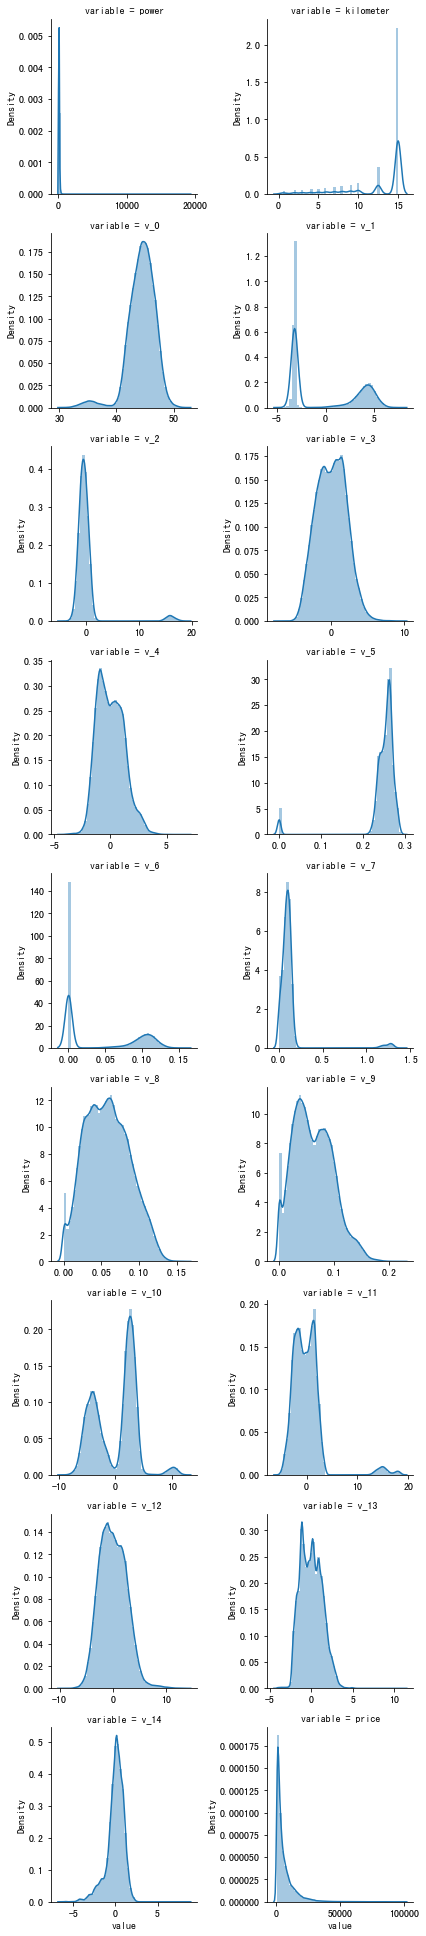

In [52]:
f = pd.melt(train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

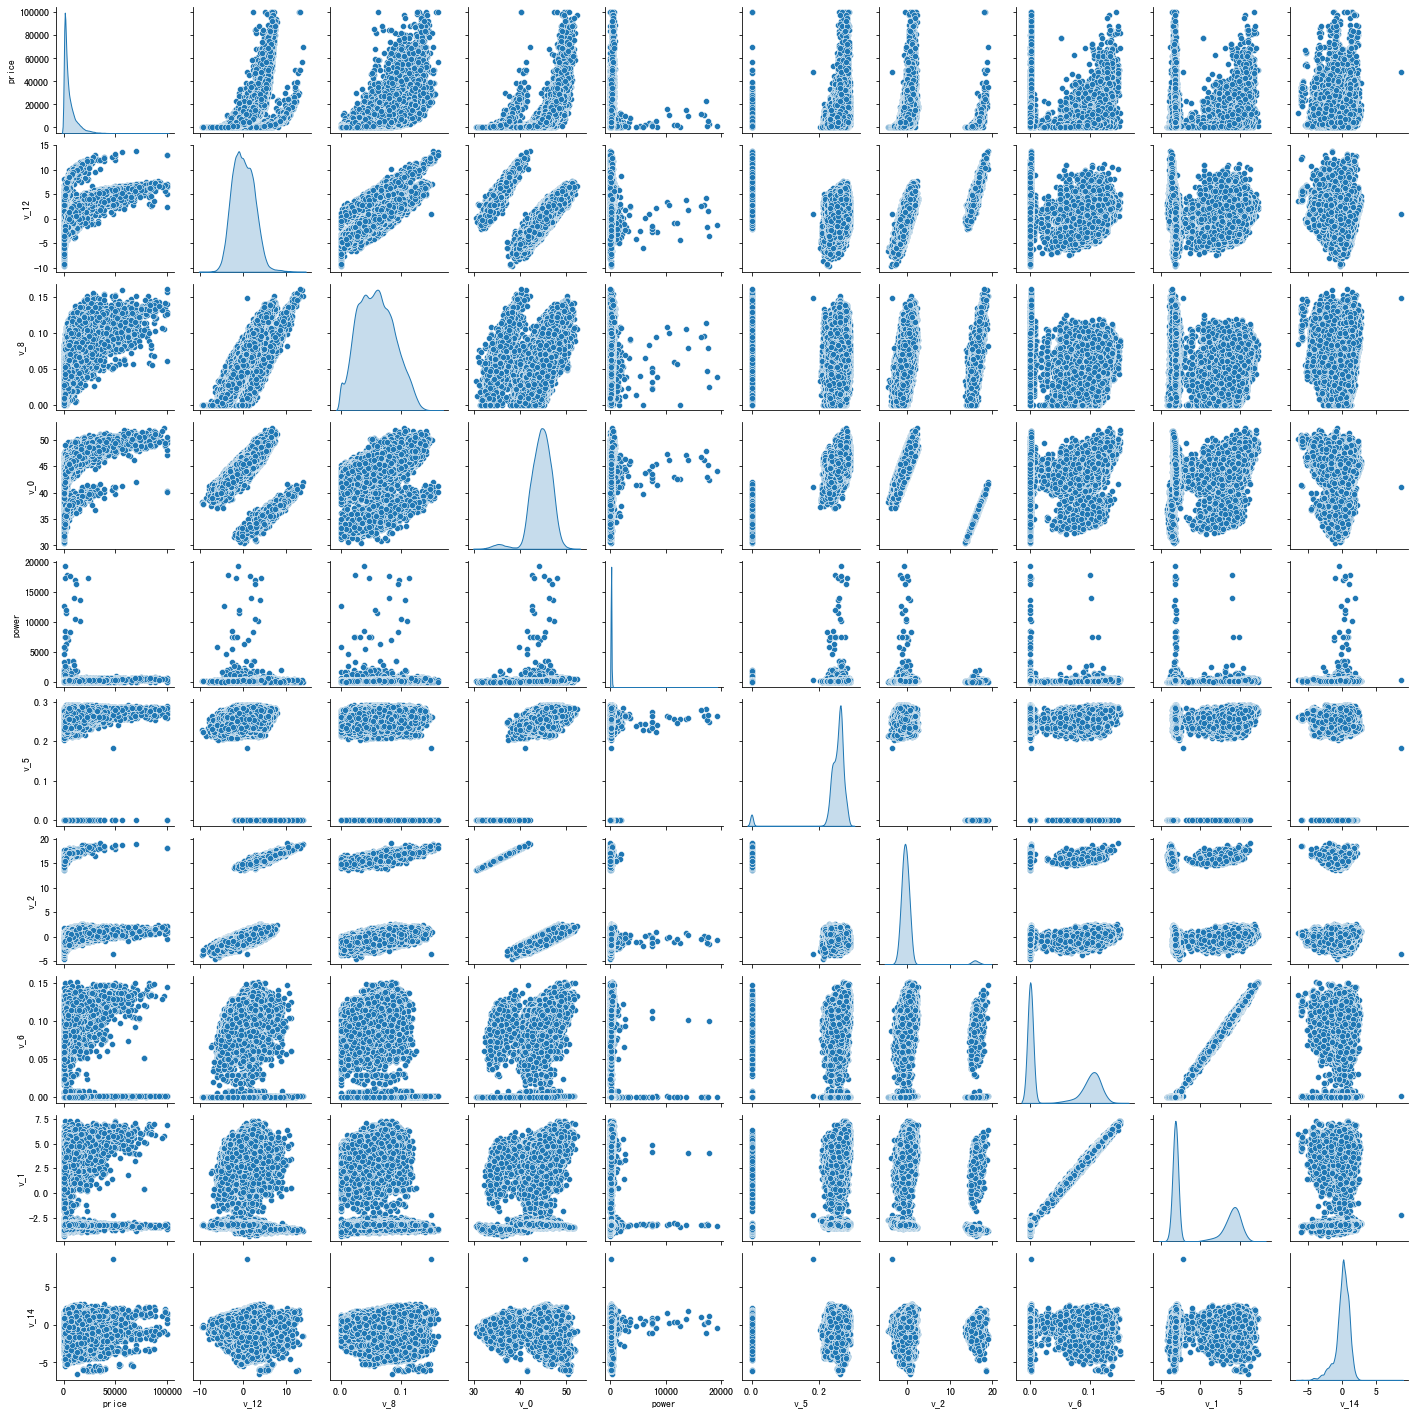

In [53]:
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()